In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
from keras.models import Model
from tensorflow import keras
from keras import layers

In [2]:
TRAINING_EPOCHS = 10
BATCH_SIZE = 32

In [ ]:
#Not needed

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        print(f'Found class directory: {class_name}')
        image_files = os.listdir(class_dir)
        print(f'Image files in {class_name}: {image_files}')

In [ ]:
#Create data into folders and classify

import os
import shutil
import pandas as pd

# Path to the CSV file and img/test directory
csv_file_path = 'driver_imgs_list.csv'  # Replace with the correct CSV file path
img_dir = 'imgs/test1'  # Directory where class folders will be created
image_folder = 'imgs/test'  # Folder containing the images

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Check the CSV structure (for debugging)
print(df.head())  # Ensure it has 'classname' and 'img' columns

# Create directories for each class if they don't exist
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

# Iterate through the rows of the DataFrame and create directories
for index, row in df.iterrows():
    class_name = row['classname']
    image_filename = row['img']  # Image filename (only the name, not the full path)

    # Construct the full image path (from image_folder + image_filename)
    image_path = os.path.join(image_folder, image_filename)

    # Ensure class folder exists
    class_folder = os.path.join(img_dir, class_name)
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)
        print(f'Created folder: {class_folder}')

    # Check if the image exists in the source directory
    if os.path.exists(image_path):
        # Copy the image to the class folder
        dest_path = os.path.join(class_folder, image_filename)
        shutil.copy(image_path, dest_path)
        print(f'Copied {image_filename} to {class_folder}')
    else:
        print(f'Image not found: {image_path}')


In [3]:
data_dir = '../modified/test'
image_paths = []
labels = []

# Iterate over the subdirectories in the data directory
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        # Get the list of image files in the class directory
        image_files = os.listdir(class_dir)
        # Append the image paths and labels
        image_paths.extend([os.path.join(class_dir, img_file) for img_file in image_files])
        labels.extend([class_name] * len(image_files))

# Create a DataFrame from the image paths and labels
data = {'filename': image_paths, 'label': labels}
test_df = pd.DataFrame(data)

# Print the resulting DataFrame
print(test_df.head())

                             filename label
0  ../modified/test\c0\img_100074.jpg    c0
1  ../modified/test\c0\img_100665.jpg    c0
2  ../modified/test\c0\img_101286.jpg    c0
3   ../modified/test\c0\img_10141.jpg    c0
4  ../modified/test\c0\img_101414.jpg    c0


In [4]:
test_df['label'].value_counts()

label
c1    500
c3    491
c2    480
c4    466
c5    466
c0    463
c6    457
c9    395
c8    390
c7    377
Name: count, dtype: int64

<Axes: title={'center': 'Test data distribution'}, ylabel='count'>

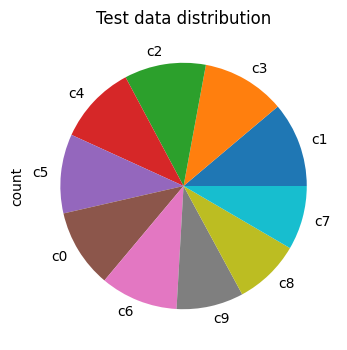

In [5]:
test_df['label'].value_counts().plot(kind='pie', figsize=(4, 4), title='Test data distribution')

In [6]:
data_dir = '../modified/train'
image_paths = []
labels = []

# Iterate over the subdirectories in the data directory
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        # Get the list of image files in the class directory
        image_files = os.listdir(class_dir)
        # Append the image paths and labels
        image_paths.extend([os.path.join(class_dir, img_file) for img_file in image_files])
        labels.extend([class_name] * len(image_files))

# Create a DataFrame from the image paths and labels
data = {'filename': image_paths, 'label': labels}
train_df = pd.DataFrame(data)

# Print the resulting DataFrame
print(train_df.head())


                              filename label
0  ../modified/train\c0\img_100026.jpg    c0
1   ../modified/train\c0\img_10003.jpg    c0
2  ../modified/train\c0\img_100050.jpg    c0
3   ../modified/train\c0\img_10012.jpg    c0
4  ../modified/train\c0\img_100145.jpg    c0


In [ ]:
#Create data into folders and classify

import os
import shutil
from sklearn.model_selection import train_test_split

# Assuming train_df is already defined as a pandas DataFrame
# Example structure:
# train_df = pd.DataFrame({
#     'filename': ['imgs/train/c0/img_100026.jpg', 'imgs/train/c1/img_100027.jpg', ...],
#     'label': ['c0', 'c1', ...]
# })

# Path to the 'modified' directory where 'train' and 'test' will be created
modified_dir = 'modified'

# Split the DataFrame into train and test sets (80-20 split)
train_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Create 'train' and 'test' directories under 'modified'
train_dir = os.path.join(modified_dir, 'train')
test_dir = os.path.join(modified_dir, 'test')

# Create the 'train' and 'test' directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Function to create subfolders for each label and copy images
def create_label_folders_and_copy_images(df, base_dir):
    for label in df['label'].unique():
        # Create a subfolder for each label inside the base_dir
        label_folder = os.path.join(base_dir, label)
        os.makedirs(label_folder, exist_ok=True)

        # Filter the dataframe for the current label
        label_df = df[df['label'] == label]

        # Copy the images to the respective label folder
        for _, row in label_df.iterrows():
            image_path = row['filename']  # Full path to the image
            image_name = os.path.basename(image_path)  # Get the image name from the filename

            # Create the destination path in the label subfolder
            dest_path = os.path.join(label_folder, image_name)

            # Ensure the source image exists and then copy it
            if os.path.exists(image_path):
                shutil.copy(image_path, dest_path)
                print(f"Copied {image_name} to {label_folder}")
            else:
                print(f"Image not found: {image_path}")

# Create label folders and copy images for both train and test sets
create_label_folders_and_copy_images(train_df, train_dir)
create_label_folders_and_copy_images(test_df, test_dir)


In [7]:
train_df['label'].value_counts()

label
c0    2026
c6    1868
c4    1860
c3    1855
c5    1846
c2    1837
c1    1767
c9    1734
c7    1625
c8    1521
Name: count, dtype: int64

<Axes: title={'center': 'Train data distribution'}, ylabel='count'>

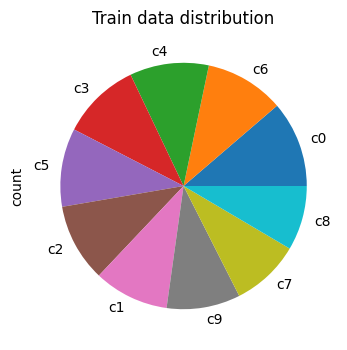

In [8]:
train_df['label'].value_counts().plot(kind='pie', figsize=(4, 4), title='Train data distribution')


In [9]:
train_df['filename'][1]


'../modified/train\\c0\\img_10003.jpg'

In [10]:
main_path = 'modified'


In [11]:
#Check if any missing file, verify path
import os

# Verify and standardize the base directory
base_dir =""  # Normalize the path for consistency

# Ensure consistent forward slashes in filenames
train_df['filename'] = train_df['filename'].str.replace("\\", "/")

# Check if each file exists and print the full path for missing ones
missing_files = []
for file in train_df['filename']:
    full_path = os.path.join(base_dir, file)
    if not os.path.exists(full_path):
        missing_files.append(full_path)  # Store the full path of missing files

# Report the missing files
print(f"Missing files: {len(missing_files)}")
print("Sample missing file paths:", missing_files[:10])  # Show a sample of missing paths


Missing files: 0
Sample missing file paths: []


In [12]:
train_df['filename'] = train_df['filename'].str.replace("\\", "/")
test_df['filename'] = test_df['filename'].str.replace("\\", "/")

print(train_df.tail())
print(test_df.tail())

                                 filename label
17934  ../modified/train/c9/img_99733.jpg    c9
17935  ../modified/train/c9/img_99740.jpg    c9
17936  ../modified/train/c9/img_99801.jpg    c9
17937  ../modified/train/c9/img_99927.jpg    c9
17938  ../modified/train/c9/img_99949.jpg    c9
                               filename label
4480  ../modified/test/c9/img_98582.jpg    c9
4481  ../modified/test/c9/img_98631.jpg    c9
4482  ../modified/test/c9/img_99422.jpg    c9
4483  ../modified/test/c9/img_99761.jpg    c9
4484   ../modified/test/c9/img_9993.jpg    c9


In [13]:
gen = ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip=True,
    vertical_flip=False,
    zoom_range=0.05,
    rotation_range=25
)

train_generator = gen.flow_from_dataframe(
    train_df,                   # dataframe
    directory="",                # Set directory to empty to avoid duplication
    x_col="filename",            # 'filename' has full relative paths like "modified/train/c0/img_100026.jpg"
    y_col="label",
    color_mode="rgb",
    target_size=(180, 180),      # image height , image width
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=42
)


Found 17939 validated image filenames belonging to 10 classes.


In [ ]:
#Not needed

gen = ImageDataGenerator(rescale         = 1./255.,
                         horizontal_flip = True,
                         vertical_flip   = False,
                         zoom_range      = 0.05,
                         rotation_range  = 25)
 
train_generator = gen.flow_from_dataframe(
    train_df, # dataframe
    directory = main_path + '/train', # images data path / folder in which images are there
    x_col = 'filename',
    y_col = 'label',
    color_mode = "rgb",
    target_size = (180, 180), # image height , image width
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True,
    seed = 42,
    # validate_filenames=False
    )

In [14]:
test_gen = ImageDataGenerator(rescale = 1./255.)

test_generator = test_gen.flow_from_dataframe(
    test_df, # dataframe
    directory   = "", # images data path / folder in which images are there
    x_col       = 'filename',
    y_col       = 'label',
    color_mode  = "rgb",
    target_size = (180, 180), # image height , image width
    class_mode = 'categorical',
    batch_size  = 32,
    shuffle = True,
    seed = 42)

Found 4485 validated image filenames belonging to 10 classes.


In [15]:
a = train_generator.class_indices
class_names = list(a.keys())

In [16]:
class_names

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [17]:
def plot_history(history):
    # store results
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # plot results
    # accuracy
    plt.figure(figsize=(5, 8))
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.grid'] = True
    plt.rcParams['figure.facecolor'] = 'white'
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(round(acc[-1],3))}\nValidation Accuracy: {str(round(val_acc[-1],3))}')
    
    # loss
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title(f'Training and Validation Loss. \nTrain Loss: {str(round(loss[-1],3))}\nValidation Loss: {str(round(val_loss[-1],3))}')
    plt.xlabel('epoch')
    plt.tight_layout(pad=3.0)
    plt.show()

In [18]:
from keras.models import Model

def create_model(base_model):
    
    x = base_model.output    
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation = 'relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(64, activation = 'relu')(x)
    x = Dropout(0.2)(x)
    
    outputs = Dense(len(class_names), activation='softmax')(x)
    
    model = Model(base_model.inputs, outputs)
    
    return model  

In [19]:
def fit_model(model, base_model, epochs, fine_tune = 0):
    
    early = tf.keras.callbacks.EarlyStopping( patience = 10,
                                              min_delta = 0.001,
                                              restore_best_weights = True)
    
    print("Unfreezing number of layers in base model = ", fine_tune)
    
    if fine_tune > 0:
        base_model.trainable = True
        for layer in base_model.layers[:-fine_tune]:
            layer.trainable = False       
        # small learning rate for fine tuning
        model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    else:
        base_model.trainable = False
        model.compile(optimizer=tf.keras.optimizers.Adam(),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    history = model.fit(train_generator,
                        validation_data = test_generator,
                        epochs = epochs,
                        callbacks = [early])
    
    return history

In [20]:
from tensorflow.keras.applications import DenseNet121

# Load the DenseNet121 base model pretrained on ImageNet
densenet_base_model = DenseNet121(
    include_top=False,          # Exclude the final classification layer
    weights='imagenet',         # Use weights pre-trained on ImageNet
    input_shape=(180, 180, 3)   # Input shape must match the dataset
)

# Pass the DenseNet base model to the custom `create_model` function
densenet_model = create_model(densenet_base_model)
densenet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 180, 180, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 186, 186, 3)       │               0 │ input_layer[0][0]          │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 90, 90, 64)        │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 90, 90, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 90, 90, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 92, 92, 64)        │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 45, 45, 64)        │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 45, 45, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 45, 45, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 45, 45, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 45, 45, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 45, 45, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 45, 45, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 45, 45, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 7,177,610 (27.38 MB)

 Trainable params: 7,093,962 (27.06 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [21]:
history = fit_model(densenet_model, densenet_base_model, epochs = TRAINING_EPOCHS,fine_tune = 2)


Unfreezing number of layers in base model =  2


C:\Users\choll\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


C:\Users\choll\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


561/561 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0949 - loss: 2.7108

C:\Users\choll\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


561/561 ━━━━━━━━━━━━━━━━━━━━ 1378s 2s/step - accuracy: 0.0949 - loss: 2.7106 - val_accuracy: 0.1278 - val_loss: 2.2998
Epoch 2/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 1036s 2s/step - accuracy: 0.1190 - loss: 2.3981 - val_accuracy: 0.1623 - val_loss: 2.2605
Epoch 3/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 1029s 2s/step - accuracy: 0.1293 - loss: 2.3277 - val_accuracy: 0.2038 - val_loss: 2.2328
Epoch 4/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 1029s 2s/step - accuracy: 0.1396 - loss: 2.2985 - val_accuracy: 0.2397 - val_loss: 2.2086
Epoch 5/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 1029s 2s/step - accuracy: 0.1610 - loss: 2.2667 - val_accuracy: 0.2713 - val_loss: 2.1812
Epoch 6/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 1030s 2s/step - accuracy: 0.1738 - loss: 2.2448 - val_accuracy: 0.2988 - val_loss: 2.1489
Epoch 7/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 1030s 2s/step - accuracy: 0.1878 - loss: 2.2207 - val_accuracy: 0.3327 - val_loss: 2.1054
Epoch 8/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 1029s 2s/step - accuracy: 0.2077 - loss: 2.1902 - val_accurac

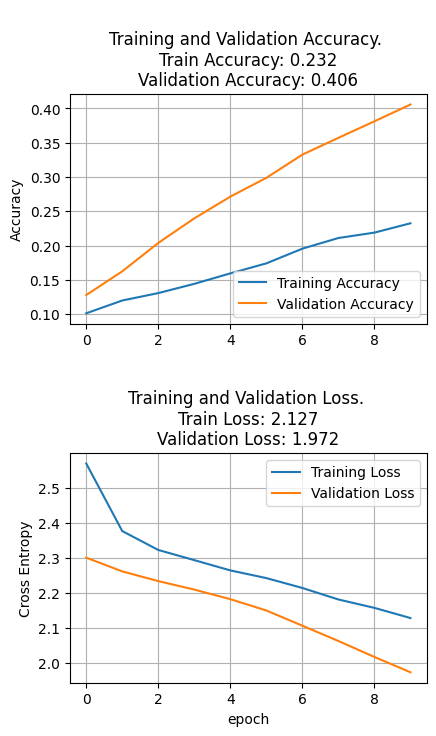

In [22]:
plot_history(history)

In [23]:
# After training the model
densenet_model.save("DenseNet-Freeze-2.keras")
print("Model saved successfully!")


Model saved successfully!


In [27]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("DenseNet.keras")


In [28]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and preprocess the new image
image_path = "modified/test/c3/img_477.jpg"
img = load_img(image_path, target_size=(180, 180))  # Resize to match input shape
img_array = img_to_array(img)                       # Convert image to array
img_array = np.expand_dims(img_array, axis=0)       # Add batch dimension
img_array /= 255.0                                  # Rescale pixel values

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)  # Get the class with highest probability
print("Predicted class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted class: [3]


In [29]:
# Get true labels
true_labels = test_generator.classes  # Ground truth labels
class_indices = test_generator.class_indices  # Class index mapping



In [35]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the test dataset
test_data_dir = "modified/test"  # Update this with the path to your test dataset
img_height, img_width = 180, 180    # Match this with your model's input size
batch_size = 32

# Preprocess the test data
test_datagen1 = ImageDataGenerator(rescale=1.0/255.0)
test_generator1 = test_datagen1.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' if using one-hot encoding
    shuffle=False
)

# Get true labels
true_labels = test_generator1.classes  # Ground truth labels
class_indices = test_generator1.class_indices  # Class index mapping

# Make predictions
predictions = model.predict(test_generator1, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)  # Get predicted class indices

# Calculate Precision, Recall, and F1 Score
precision = precision_score(true_labels, predicted_labels, average='micro')
recall = recall_score(true_labels, predicted_labels, average='micro')
f1 = f1_score(true_labels, predicted_labels, average='micro')

# Print the results
print(f"Precision (Micro): {precision:.4f}")
print(f"Recall (Micro): {recall:.4f}")
print(f"F1 Score (Micro): {f1:.4f}")

# Optional: Print class-wise metrics
class_wise_precision = precision_score(true_labels, predicted_labels, average=None, labels=np.unique(true_labels))
class_wise_recall = recall_score(true_labels, predicted_labels, average=None, labels=np.unique(true_labels))

print("\nClass-wise Precision:")
for class_name, score in zip(class_indices.keys(), class_wise_precision):
    print(f"{class_name}: {score:.4f}")

print("\nClass-wise Recall:")
for class_name, score in zip(class_indices.keys(), class_wise_recall):
    print(f"{class_name}: {score:.4f}")


Found 4485 images belonging to 10 classes.


C:\Users\choll\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step
Precision (Micro): 0.8085
Recall (Micro): 0.8085
F1 Score (Micro): 0.8085

Class-wise Precision:
c0: 0.8153
c1: 0.8246
c2: 0.7200
c3: 0.9692
c4: 0.7262
c5: 0.9264
c6: 0.8306
c7: 0.9025
c8: 0.7909
c9: 0.6891

Class-wise Recall:
c0: 0.7149
c1: 0.8180
c2: 0.9375
c3: 0.7699
c4: 0.9506
c5: 0.7833
c6: 0.7724
c7: 0.9576
c8: 0.5333
c9: 0.8304


In [ ]:
print(test_generator[0])

In [ ]:
print(true_labels)
print(predicted_labels)
